from sklearn.datasets import make_classification

In [7]:
import numpy as np
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [23]:
import matplotlib.pyplot as plt


[1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1]


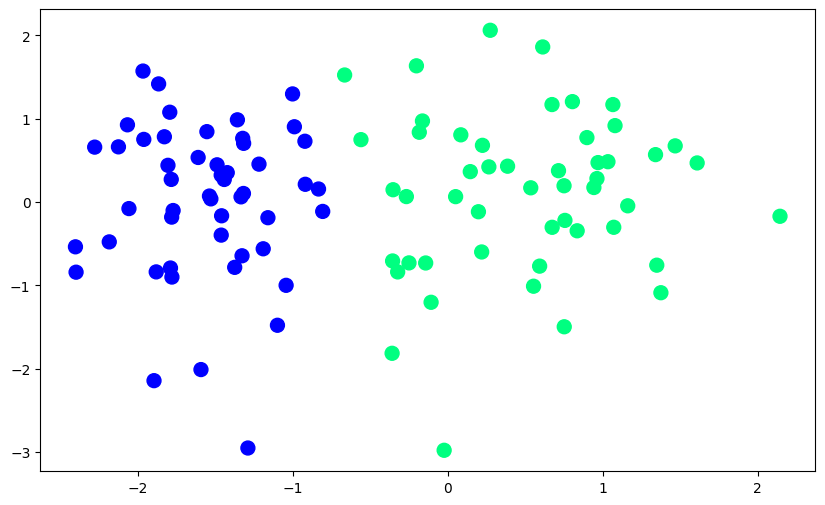

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [13]:
def perceptron(X, y):
    # Insert bias term into X
    X = np.insert(X, 0, 1, axis=1)
    
    # Initialize weights (including bias)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    # Training loop
    for i in range(1000):
        # Select random sample
        j = np.random.randint(0, len(X))
        
        # Predict using step function
        y_hat = step(np.dot(X[j], weights))
        
        # Update weights
        weights = weights + lr * (y[j] - y_hat) * X[j]
    
    # Return bias (weights[0]) and the rest of the weights (weights[1:])
    return weights[0], weights[1:]

In [14]:
def step(z):
    return 1 if z>0 else 0

In [15]:
intercept_,coef_=perceptron(X,y)


In [17]:
print(coef_)
print(intercept_)

[1.31562831 0.01519089]
0.9


In [18]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [20]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.0, 2.0)

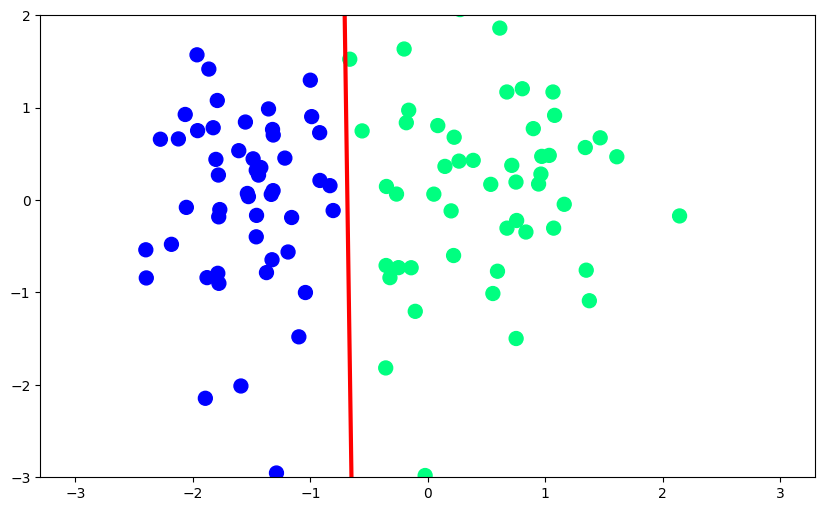

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
